#03 - First Neural Network (Training, Evaluation & Prediction)


In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [14]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [16]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [19]:
# Normalize data: 0,255 -> 0,1
x_train, x_test = x_train/255.0, x_test/255.0

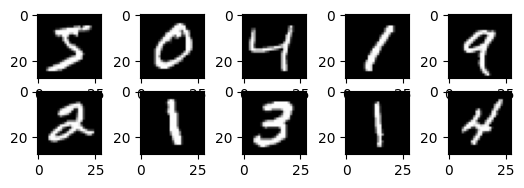

In [30]:
for i in range(10):
  plt.subplot(5,5, i+1)
  plt.imshow(x_train[i], cmap='gray')
plt.show()

In [46]:
# Model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10), # we have not used softmax here it will automatically added in loss layer during training only for prediction we need to add
])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
# Loss and Optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True)
optim = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']

model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [44]:
#Training
batch_size = 64
epochs = 5

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)

Epoch 1/5
938/938 - 5s - loss: 0.3005 - accuracy: 0.9145 - 5s/epoch - 5ms/step
Epoch 2/5
938/938 - 3s - loss: 0.1354 - accuracy: 0.9599 - 3s/epoch - 3ms/step
Epoch 3/5
938/938 - 3s - loss: 0.0972 - accuracy: 0.9707 - 3s/epoch - 4ms/step
Epoch 4/5
938/938 - 3s - loss: 0.0735 - accuracy: 0.9778 - 3s/epoch - 4ms/step
Epoch 5/5
938/938 - 3s - loss: 0.0584 - accuracy: 0.9825 - 3s/epoch - 4ms/step


In [45]:
# evaluate
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 0s - loss: 0.0819 - accuracy: 0.9766 - 385ms/epoch - 2ms/step


[0.0819324254989624, 0.9765999913215637]

In [50]:
# Prediction
probability_model = keras.models.Sequential([
    model,
    keras.layers.Softmax()
]) 

In [51]:
predictions = probability_model(x_test)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

tf.Tensor(
[0.08903272 0.10220511 0.0716915  0.15089804 0.10928624 0.12345118
 0.07424838 0.10440458 0.10195907 0.0728232 ], shape=(10,), dtype=float32)
3


In [57]:
# Another way 
# model + softmax
predictions = model(x_test) # model.predict(x_test, batch_size = batch_size) can also be done like this
predictions = tf.nn.softmax(predictions)
pred0 = predictions[0]
print(pred0)
label0 = np.argmax(pred0)
print(label0)

tf.Tensor(
[0.08903272 0.10220511 0.0716915  0.15089804 0.10928624 0.12345118
 0.07424838 0.10440458 0.10195907 0.0728232 ], shape=(10,), dtype=float32)
3


In [62]:
pred05s = predictions[0:5]
print(pred05s.shape)

label05s = np.argmax(pred05s, axis=1)
print(label05s)

(5, 10)
[3 7 1 7 6]
